# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib


In [77]:
df=pd.read_csv("/Users/rekhagrg/Downloads/temperature.csv")

In [78]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [79]:
#check for missing value 
print(df.isnull().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [80]:
# For simplicity, let's fill missing numerical values with the mean
df.fillna(df.mean(), inplace=True)

/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_89591/1299420120.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [81]:
print(df.isnull().sum())

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


In [82]:
print(X_train_min.dtypes)

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
day_of_week         float64
month               float64
dtype: object


In [83]:
print(X_test_min.dtypes)

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
day_of_week         float64
month               float64
dtype: object


In [92]:
print(X_train_min.isnull().sum())
print(X_test_min.isnull().sum())


station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
day_of_week         2
month               2
dtype: int64
station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope              

In [93]:
# Check for NaN values
print(df.isnull().sum())

# Handle NaN values by filling them with the mean of the respective column
df.fillna(df.mean(), inplace=True)

# Alternatively, you can drop rows with NaN values
# df.dropna(inplace=True)


station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day_of_week         0
month               0
dtype: int64


In [94]:
# Check for infinity values
print(df[~np.isfinite(df).all(1)])

# Replace infinity values with a large finite value
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(1e9, inplace=True)  # Replace NaN with a large finite value


Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, day_of_week, month]
Index: []

[0 rows x 26 columns]


In [95]:
# Ensure all values are finite
if not np.isfinite(df.values).all():
    # Handle remaining infinite or NaN values if any
    print("Dataset contains NaN or infinity values.")


In [97]:
# Split the data into features and target variables for minimum and maximum temperatures
X_min_temp = df.drop(['Next_Tmin', 'Next_Tmax'], axis=1)
y_min_temp = df['Next_Tmin']

X_max_temp = df.drop(['Next_Tmin', 'Next_Tmax'], axis=1)
y_max_temp = df['Next_Tmax']

# Perform train-test split
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min_temp, y_min_temp, test_size=0.2, random_state=42)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max_temp, y_max_temp, test_size=0.2, random_state=42)

# Model 1:Linear Regression 

In [98]:
# Minimum Temperature
lr_min = LinearRegression()
lr_min.fit(X_train_min, y_train_min)
y_pred_min = lr_min.predict(X_test_min)

# Maximum Temperature
lr_max = LinearRegression()
lr_max.fit(X_train_max, y_train_max)
y_pred_max = lr_max.predict(X_test_max)


# Model 2: Random Forest Regressor

In [99]:
# Minimum Temperature
rf_min = RandomForestRegressor()
rf_min.fit(X_train_min, y_train_min)
y_pred_min_rf = rf_min.predict(X_test_min)

# Maximum Temperature
rf_max = RandomForestRegressor()
rf_max.fit(X_train_max, y_train_max)
y_pred_max_rf = rf_max.predict(X_test_max)


# Evaluate perfomance:

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Minimum Temperature Linear Regression model
mae_lr_min = mean_absolute_error(y_test_min, y_pred_min)
mse_lr_min = mean_squared_error(y_test_min, y_pred_min)
r2_lr_min = r2_score(y_test_min, y_pred_min)

print(f"Minimum Temperature Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae_lr_min}")
print(f"Mean Squared Error: {mse_lr_min}")
print(f"R-squared: {r2_lr_min}")

# Evaluate Maximum Temperature Linear Regression model
mae_lr_max = mean_absolute_error(y_test_max, y_pred_max)
mse_lr_max = mean_squared_error(y_test_max, y_pred_max)
r2_lr_max = r2_score(y_test_max, y_pred_max)

print(f"\nMaximum Temperature Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae_lr_max}")
print(f"Mean Squared Error: {mse_lr_max}")
print(f"R-squared: {r2_lr_max}")


Minimum Temperature Linear Regression Metrics:
Mean Absolute Error: 0.7621058740630013
Mean Squared Error: 0.9660373869293611
R-squared: 0.844978619700675

Maximum Temperature Linear Regression Metrics:
Mean Absolute Error: 1.136416735301578
Mean Squared Error: 2.261100030517073
R-squared: 0.7684929276811282


# visualize predictions:

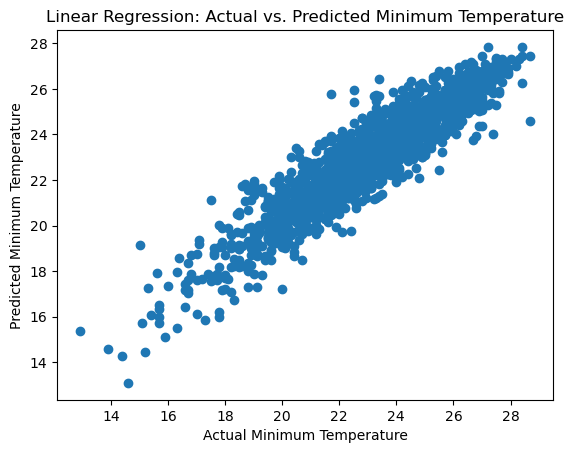

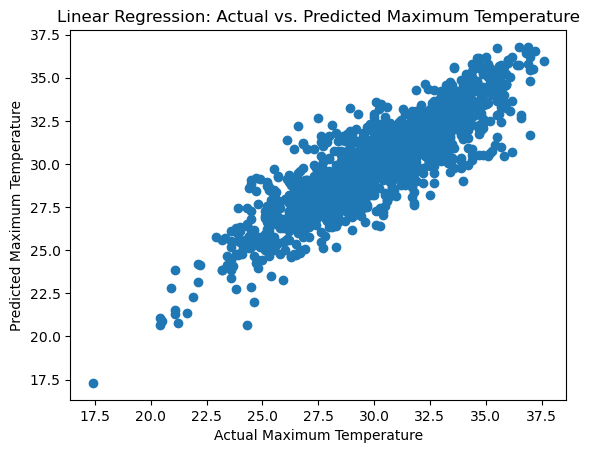

In [101]:
import matplotlib.pyplot as plt

# Scatter plot for Minimum Temperature Linear Regression
plt.scatter(y_test_min, y_pred_min)
plt.xlabel("Actual Minimum Temperature")
plt.ylabel("Predicted Minimum Temperature")
plt.title("Linear Regression: Actual vs. Predicted Minimum Temperature")
plt.show()

# Scatter plot for Maximum Temperature Linear Regression
plt.scatter(y_test_max, y_pred_max)
plt.xlabel("Actual Maximum Temperature")
plt.ylabel("Predicted Maximum Temperature")
plt.title("Linear Regression: Actual vs. Predicted Maximum Temperature")
plt.show()


# Check Residulas 

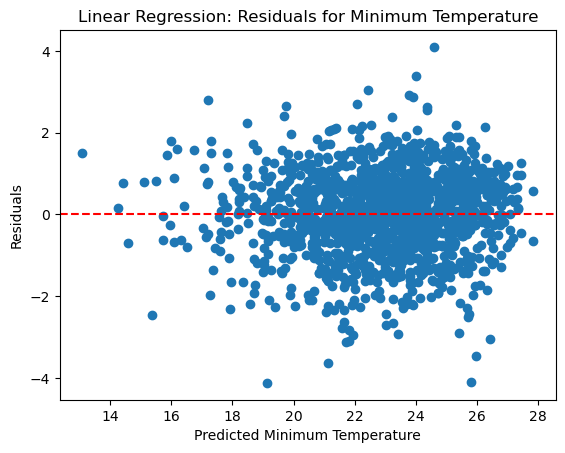

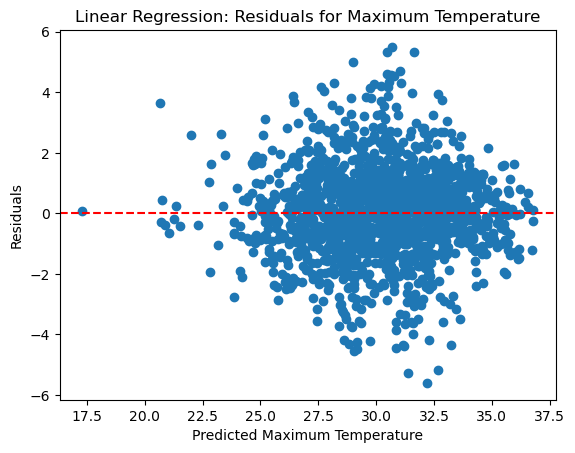

In [102]:
# Residuals for Minimum Temperature Linear Regression
residuals_min = y_test_min - y_pred_min
plt.scatter(y_pred_min, residuals_min)
plt.xlabel("Predicted Minimum Temperature")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals for Minimum Temperature")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Residuals for Maximum Temperature Linear Regression
residuals_max = y_test_max - y_pred_max
plt.scatter(y_pred_max, residuals_max)
plt.xlabel("Predicted Maximum Temperature")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals for Maximum Temperature")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# Pair plot

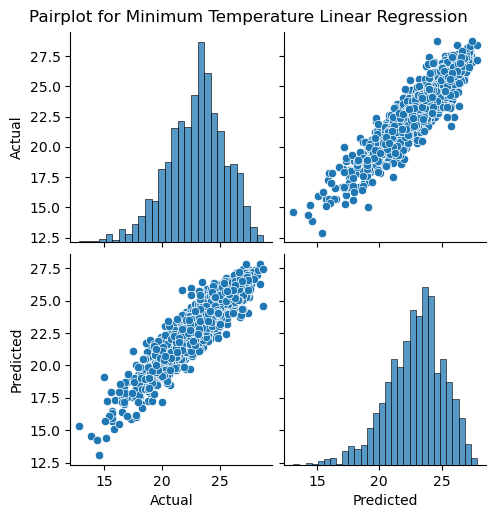

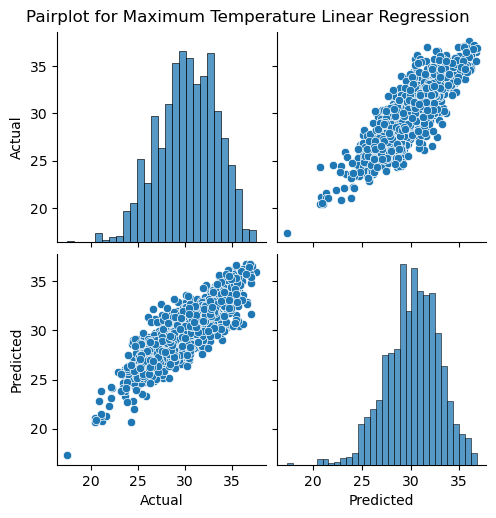

In [103]:
import seaborn as sns

# Create a DataFrame with actual and predicted values
results_min = pd.DataFrame({'Actual': y_test_min, 'Predicted': y_pred_min})

# Pairplot for Minimum Temperature Linear Regression
sns.pairplot(results_min)
plt.suptitle("Pairplot for Minimum Temperature Linear Regression", y=1.02)
plt.show()

# Repeat for Maximum Temperature
results_max = pd.DataFrame({'Actual': y_test_max, 'Predicted': y_pred_max})
sns.pairplot(results_max)
plt.suptitle("Pairplot for Maximum Temperature Linear Regression", y=1.02)
plt.show()


# summary 

Minimum Temperature Linear Regression:

1. Mean Absulate Error(MAE):0.76
2. Mean Squared Error(MSE):0.97
3.R-squire(R2):0.84

MAximum Temperature Linear Regression:

1.Mean Absulate Error (MAE):1.14
2.Mean Squared Error(MSE):2.26
3.R-squared(R2):0.77

-For both minimum and maximum temperature predictions the model perform well as indicated 
by relatively low MAE and MSE values.
-The R-squares values are also relatively high,indicating that a significant portion of variance in the temperature
is explained by models.